### Decision function
There are several ways of calculating the decision function for a linear support vector machine.  In this activity we calculate the decision function in two different ways.

### Instructions

1. Read the code and understand every line.
2. Fill in code for the dual decision function.
3. Fill in code for the normal coefficient equation.

When your solution is correct, then a message will be displayed saying that your calculation is the same as the result from scikit-learn's.

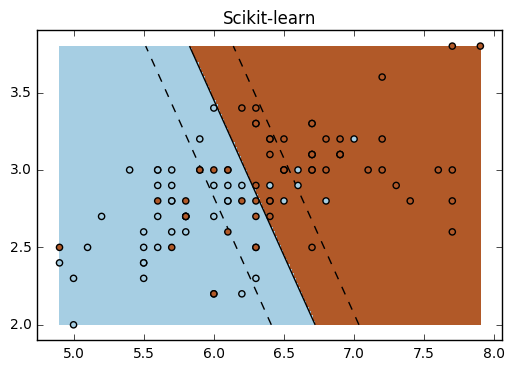

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics.pairwise import linear_kernel


def plot_data(X, y, title):
    plt.figure()
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        zorder=10,
        cmap=plt.cm.Paired,
        edgecolor='k',
        s=20)

    plt.axis('tight')
    plt.title(title)


def plot_decision(XX, YY, Z):
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=['k', 'k', 'k'],
        linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Three classes, let's discard one
X = X[y != 0, :2]
y = y[y != 0]

# Build a grid of data points to test
(x_min, y_min) = X.min(axis=0)
(x_max, y_max) = X.max(axis=0)

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
X_test = np.c_[XX.ravel(), YY.ravel()]

# fit the model
kernel = linear_kernel
clf = svm.SVC(kernel='linear', gamma=10)
clf.fit(X, y)

# The scikit decision function
Z_scikit = clf.decision_function(X_test)
plot_data(X, y, "Scikit-learn")
plot_decision(XX, YY, Z_scikit)

# Pull out the data that we need:
dual_coefficients = clf.dual_coef_
coefficients = clf.coef_
support_vectors = clf.support_vectors_
intercept = clf.intercept_


### Using the coefficients directly

Multiply the weights together with the datapoint, and add the intercept to get the final decision value.

Coefficient decision function correct


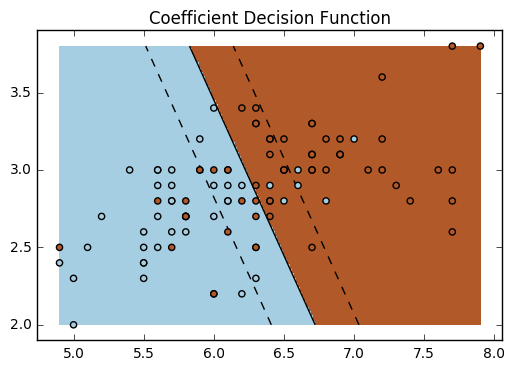

In [52]:
def decision_function_coefficients(w, X, intercept):
    # Add code here to emulate the decision function
#     return np.dot(X, w.T) + intercept
    return np.dot(w, X.T) + intercept


Z_coef = decision_function_coefficients(coefficients, X_test, intercept)
plot_data(X, y, "Coefficient Decision Function")
plot_decision(XX, YY, Z_coef)

if np.allclose(Z_coef.flatten(), Z_scikit.flatten()):
    print("Coefficient decision function correct")
else:
    print("Broken coefficient decision function?")


### The dual decision function

We can apply the kernel function to the point we're trying to classify and each of the support vectors.  
Then take a weighted sum of the results and add the intercept together to get the final decision value.

ERROR:root:Line magic function `%` not found.


Dual decision function correct


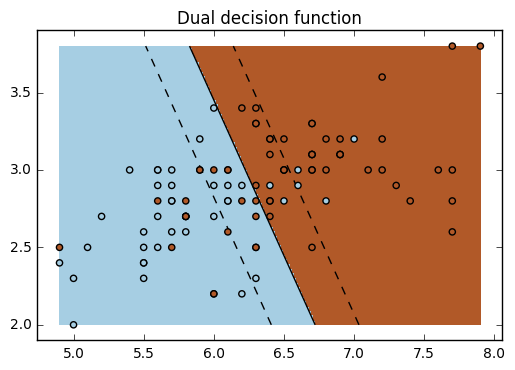

In [50]:
#import magic

def decision_function_dual(kernel, X, support_vectors, dual_coefficients,
                           intercept):
    # Add code here to emulate the decision function
    return np.dot(dual_coefficients, kernel(X, support_vectors).T) + intercept


Z_dual = decision_function_dual(kernel, X_test, support_vectors,
                                dual_coefficients, intercept)

plot_data(X, y, "Dual decision function")
plot_decision(XX, YY, Z_dual)

if np.allclose(Z_dual.flatten(), Z_scikit.flatten()):
    print("Dual decision function correct")
else:
    print("Broken dual decision function?")
